# Classification Multiclasse – Iris
## 1. Chargement des données

In [41]:
import pandas as pd

df = pd.read_csv("../data/iris.csv")


print(df.head())
print(df.describe())
print(df.info())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%   

## 2. Préparation des données

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop("Species", axis=1)
y = df["Species"]

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_std, y, test_size=0.2, random_state=42, stratify=y
)

## 3. Modèle KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print(accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

1.0
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



From scratch

In [44]:
# Distance euclidienne
def distance_euclidienne(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# KNN from scratch
def knn_predict(X_train, y_train, x_query, k=5):
    distances = []
    for i in range(len(X_train)):
        d = distance_euclidienne(X_train[i], x_query)
        distances.append((d, y_train[i]))
    distances.sort(key=lambda x: x[0])
    voisins = distances[:k]
    classes = [v[1] for v in voisins]
    valeurs, nombre = np.unique(classes, return_counts=True)
    return valeurs[np.argmax(nombre)]

preds = []
for i in range(len(X_test)):
    p = knn_predict(X_train, y_train.to_numpy(), X_test[i], k=5)
    preds.append(p)

print(accuracy_score(y_test, preds))
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))


1.0
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



## 4. Modèle SVM

In [45]:
from sklearn.svm import SVC

svm = SVC(kernel="rbf", C=1.0, gamma="scale")
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

accuracy_score(y_test, y_pred_svm)

1.0

## 5. Zones de décision (2 features)

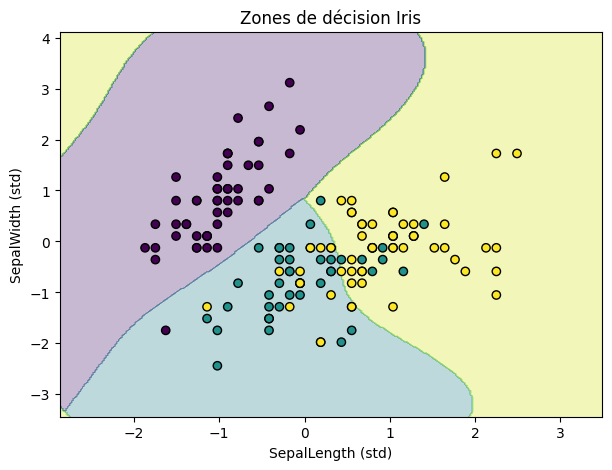

In [46]:
import numpy as np
import matplotlib.pyplot as plt

X2 = df[["SepalLengthCm","SepalWidthCm"]].values
y2 = df["Species"].astype("category").cat.codes

scaler2 = StandardScaler()
X2_std = scaler2.fit_transform(X2)

model = SVC(kernel="rbf", gamma="scale")
model.fit(X2_std, y2)

x_min, x_max = X2_std[:,0].min()-1, X2_std[:,0].max()+1
y_min, y_max = X2_std[:,1].min()-1, X2_std[:,1].max()+1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X2_std[:,0], X2_std[:,1], c=y2, edgecolor="k")
plt.xlabel("SepalLength (std)")
plt.ylabel("SepalWidth (std)")
plt.title("Zones de décision Iris")
plt.show()